We have a real problem with crime in the U.S., but it's often hard to get a handle of what's happening in any real context because of the way that news is reported and because of the shear volume. This notebook takes a look at crime US crime data from 1975 to 2015. It takes a look at crime and how it's changed over the years across the country.

As a native Chicagoan, I was also interested in identifying and comparing the cities with the most crime per capita compared to Chicago, which is often viewed as the murder capital of the country.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

raw_data = pd.read_csv("report.csv")
#data provided from https://www.kaggle.com/marshallproject/crime-rates
raw_data.head()

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10


In [8]:
raw_data.describe()
raw_data.info()
# Does each jurisdiction have unique agency code? Yes
raw_data.groupby('agency_jurisdiction')['agency_code'].nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2829 entries, 0 to 2828
Data columns (total 15 columns):
report_year            2829 non-null int64
agency_code            2788 non-null object
agency_jurisdiction    2829 non-null object
population             2760 non-null float64
violent_crimes         2794 non-null float64
homicides              2795 non-null float64
rapes                  2754 non-null float64
assaults               2753 non-null float64
robberies              2754 non-null float64
months_reported        2692 non-null float64
crimes_percapita       2794 non-null float64
homicides_percapita    2795 non-null float64
rapes_percapita        2754 non-null float64
assaults_percapita     2753 non-null float64
robberies_percapita    2754 non-null float64
dtypes: float64(12), int64(1), object(2)
memory usage: 331.6+ KB


agency_jurisdiction
Albuquerque, NM               1
Arlington, TX                 1
Atlanta, GA                   1
Aurora, CO                    1
Austin, TX                    1
Baltimore County, MD          1
Baltimore, MD                 1
Boston, MA                    1
Buffalo, NY                   1
Charlotte, NC                 1
Chicago, IL                   1
Cincinnati, OH                1
Cleveland, OH                 1
Columbus, OH                  1
Dallas, TX                    1
Denver, CO                    1
Detroit, MI                   1
El Paso, TX                   1
Fairfax County, VA            1
Fort Worth, TX                1
Fresno, CA                    1
Honolulu, HI                  1
Houston, TX                   1
Indianapolis, IN              1
Jacksonville, FL              1
Kansas City, MO               1
Las Vegas, NV                 1
Long Beach, CA                1
Los Angeles County, CA        1
Los Angeles, CA               1
                    

In [9]:
#Check for null values
raw_data.isnull().sum()

report_year              0
agency_code             41
agency_jurisdiction      0
population              69
violent_crimes          35
homicides               34
rapes                   75
assaults                76
robberies               75
months_reported        137
crimes_percapita        35
homicides_percapita     34
rapes_percapita         75
assaults_percapita      76
robberies_percapita     75
dtype: int64

Creating two new variables -- crime excluding rape and crime excuding rape per capita. At some point the definition and thus measurement of rape changed, so I'm going to exclude it from crime.

Crime per capita takes into account the population, thus giving a more precise way to compare cities of different sizes. Here crime per capita gives the number of crimes per 100 thousand people.


In [10]:
#raw_data.iloc[raw_data.isnull(),2,4]
raw_data[['agency_jurisdiction', 'violent_crimes','homicides']]

# crimes excluding rape -- at some point the definition of rate changed so measurement changed, so exclude for our purposes
raw_data['crime_nr'] = raw_data['violent_crimes'] - raw_data['rapes']
# crimes excluding rape per 100,000 people
raw_data['crime_nr_percapita'] = raw_data['crime_nr'] / raw_data['population'] * 100000

raw_data.head()

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita,crime_nr,crime_nr_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13,2202.0,769.289892
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46,250.0,222.265688
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32,7590.0,1547.135659
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58,567.0,486.044438
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10,1025.0,341.211718


A look at the cities with the most absolute crime. No surprise here that the most highly populated cities, have the most crime.

In [17]:
#by_grp = raw_data.groupby(['report_year', 'agency_jurisdiction'])['crime_nr'].sum().reset_index()

#by_grp['agency_jusridiction'].unique()

raw_data.groupby(['agency_jurisdiction'])['crime_nr'].sum().reset_index().sort_values(by = 'crime_nr', ascending=False).head(20)

,agency_jurisdiction,crime_nr
41,"New York City, NY",4161489.0
29,"Los Angeles, CA",1909418.0
10,"Chicago, IL",1870677.0
16,"Detroit, MI",877146.0
22,"Houston, TX",779332.0
47,"Philadelphia, PA",725883.0
6,"Baltimore, MD",582640.0
14,"Dallas, TX",556760.0
34,"Miami-Dade County, FL",479033.0
67,"Washington, DC",421742.0


It's interesting to note that crime was at astronomical highs in the major cities in the early 90's, but has been on a steady decline.

[<matplotlib.text.Text at 0x117caeb00>, <matplotlib.text.Text at 0x117cd4400>]

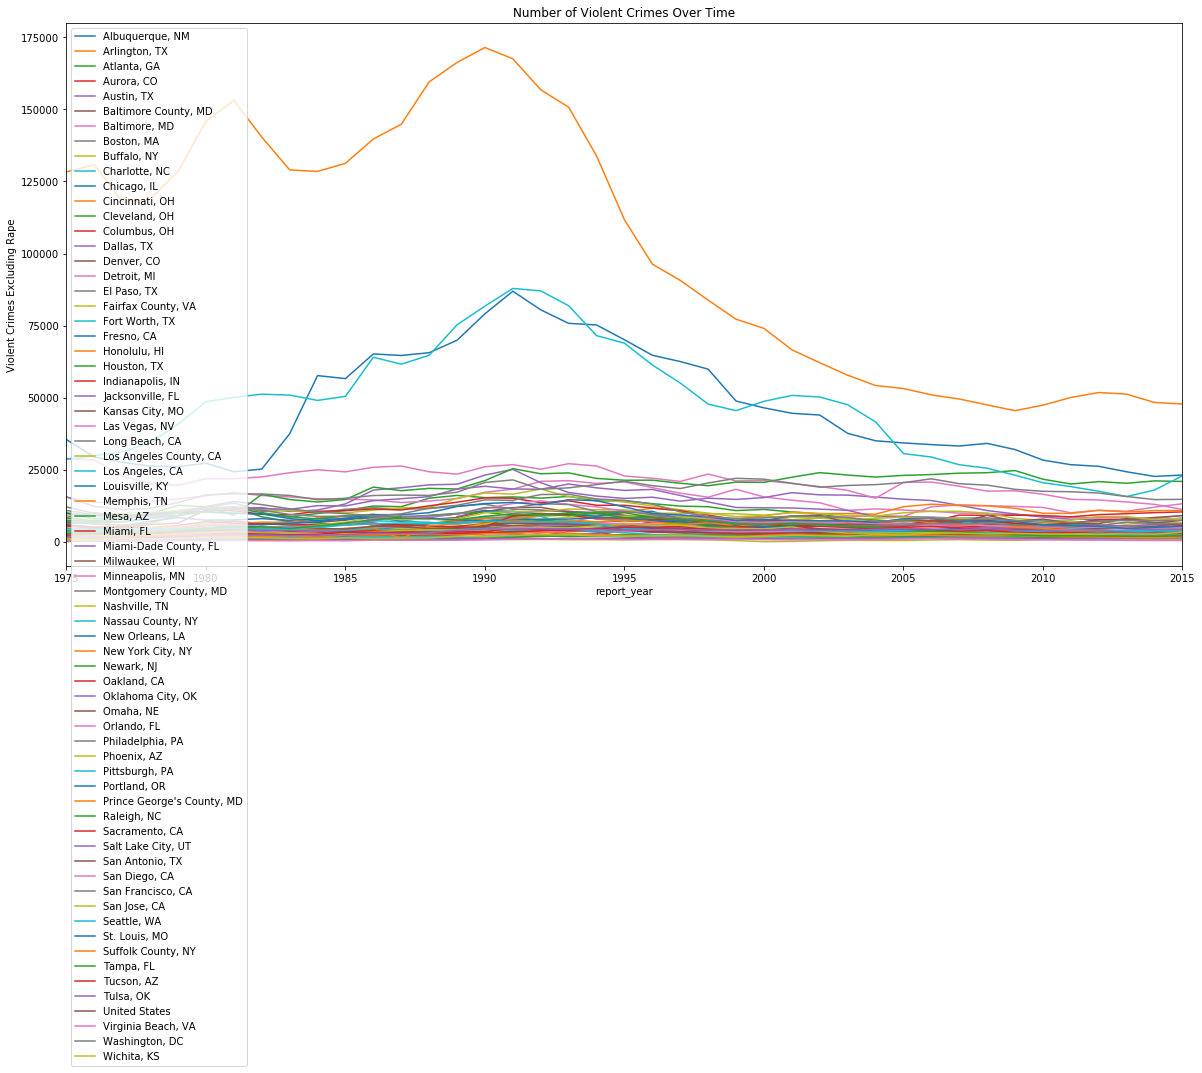

In [38]:
#yrGrp = df_copy.groupby(['restaurant','Year'])['rating'].mean().reset_index()

fig, ax = plt.subplots(figsize=(20,10))
grouped = by_grp.groupby('agency_jurisdiction')
for key, group in grouped:
    group.plot(ax =ax, x = 'report_year', y='crime_nr', label=key)
ax.set( ylabel='Violent Crimes Excluding Rape',
       title='Number of Violent Crimes Over Time')

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
grouped = raw_data.groupby('agency_jurisdiction')
for key, group in grouped:
    group.plot(ax =ax, x = 'report_year', y='crime_nr_percapita', label=key)
ax.set( ylabel='Violent Crimes Excluding Rape Per 100,000 people',
       title='Number of Violent Crimes Over Time')

In [70]:
'''Determine the cities with the most crime over the years -- top 10. Plot that against Chicago, if it's not in top 10,
and also do an average of the US. Sum of crimes per capita over all the years? This prob not good since some cities
may not have any data for certain year. Median Crime per capita over the years might work'''


med_bygrp = raw_data.groupby(['agency_jurisdiction'])['crime_nr_percapita'].median().reset_index()
    #by = 'crime_nr_percapita', ascending=False).reset_index()
med_bygrp.sort_values( by = 'crime_nr_percapita', ascending=False, inplace=True)
med_bygrp.head(20)

'''something to think about when using per capita numbers is if they are including metro area or just city. 
If including metro then this increases population and thus decreases crime per capita. Make sure when compare Chicago
numbers datasets, we are being consistent. Also make sure understand the definitions of this data'''


,agency_jurisdiction,crime_nr_percapita
2,"Atlanta, GA",2238.252744
60,"St. Louis, MO",2153.361345
16,"Detroit, MI",2133.947980
33,"Miami, FL",2074.708796
42,"Newark, NJ",2004.427673
6,"Baltimore, MD",1891.387165
62,"Tampa, FL",1792.278822
46,"Orlando, FL",1729.040848
43,"Oakland, CA",1653.303647
67,"Washington, DC",1570.900322


What are the top 10 cities in terms of average crime per capita since 2010?

In [66]:
''' Might make sense to do this exercise for the last 5 years only, but with mean instead of median'''

recnt_data = raw_data.loc[raw_data['report_year'] >= 2010]

rd_bygrp = recnt_data.groupby(['agency_jurisdiction'])['crime_nr_percapita'].mean().reset_index()
    #by = 'crime_nr_percapita', ascending=False).reset_index()
rd_bygrp.sort_values( by = 'crime_nr_percapita', ascending=False, inplace=True)
rd_bygrp.head(10)


,agency_jurisdiction,crime_nr_percapita
16,"Detroit, MI",2005.974486
60,"St. Louis, MO",1701.846684
43,"Oakland, CA",1670.137166
31,"Memphis, TN",1607.373340
6,"Baltimore, MD",1386.264930
12,"Cleveland, OH",1292.859298
35,"Milwaukee, WI",1272.082647
2,"Atlanta, GA",1262.629572
25,"Kansas City, MO",1203.542025
8,"Buffalo, NY",1192.881205


As we can see, Chicago did not make the list of top 10 cities for crime per capita averaged from 2010-2015. From here on, we will do a comparison of those top 10 cities and the city of Chicago.

In [85]:
# get a list of the top 10 cities for recent year + chicago and plot those rates over time

top_crime_lst =list( rd_bygrp['agency_jurisdiction'].head(10))

top_crime_lst.append("Chicago, IL")

top_crime_lst


#recnt_data = raw_data.loc[raw_data['report_year'] >= 2010]
top_crime_data = recnt_data.loc[recnt_data['agency_jurisdiction'].isin(top_crime_lst)]
top_crime_data.tail()

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita,crime_nr,crime_nr_percapita
2785,2015,MOKPD00,"Kansas City, MO",473373.0,6709.0,109.0,366.0,4531.0,1703.0,NaN,1417.28,23.03,77.32,957.17,359.76,6343.0,1339.958130
2791,2015,TNMPD00,"Memphis, TN",657936.0,11449.0,135.0,530.0,7653.0,3131.0,NaN,1740.14,20.52,80.55,1163.18,475.88,10919.0,1659.583911
2795,2015,WIMPD00,"Milwaukee, WI",600400.0,9583.0,145.0,436.0,5253.0,3749.0,NaN,1596.10,24.15,72.62,874.92,624.42,9147.0,1523.484344
2803,2015,CA00109,"Oakland, CA",419481.0,6051.0,85.0,285.0,2391.0,3290.0,NaN,1442.50,20.26,67.94,569.99,784.30,5766.0,1374.555701
2820,2015,MOSPD00,"St. Louis, MO",317095.0,5762.0,188.0,263.0,3521.0,1790.0,NaN,1817.12,59.29,82.94,1110.39,564.50,5499.0,1734.180608


[<matplotlib.text.Text at 0x11871cb00>, <matplotlib.text.Text at 0x1192fcfd0>]

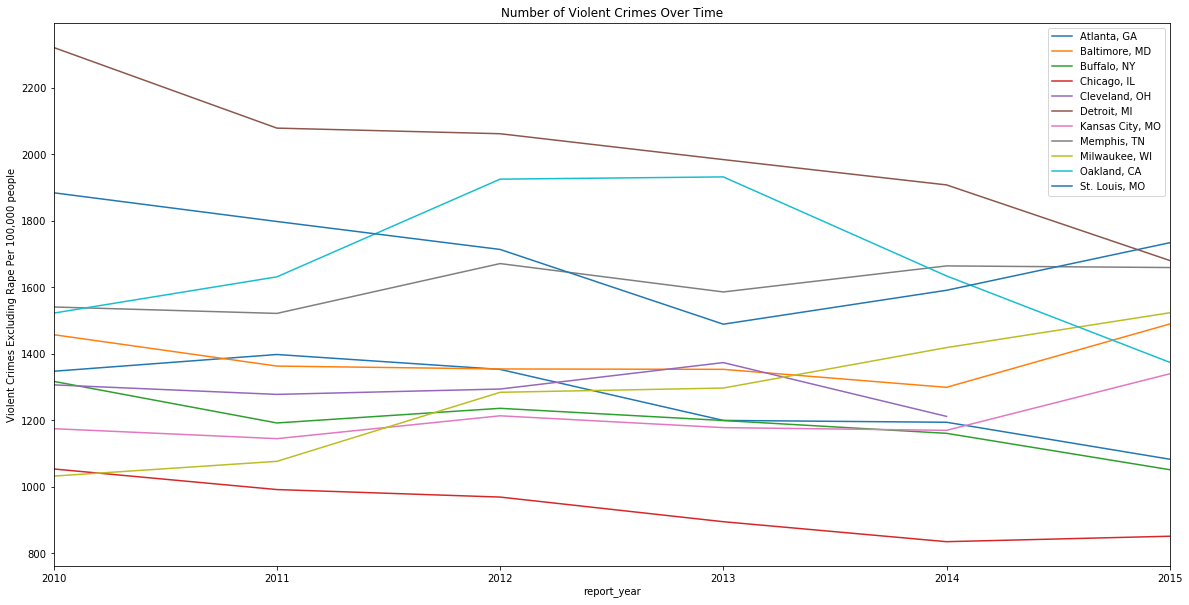

In [97]:
fig, ax = plt.subplots(figsize=(20,10))
grouped = top_crime_data.groupby('agency_jurisdiction')
for key, group in grouped:
    group.plot(ax =ax, x = 'report_year', y='crime_nr_percapita', label=key)
ax.set( ylabel='Violent Crimes Excluding Rape Per 100,000 people',
       title='Number of Violent Crimes Over Time')


# come back and add the cities so that they sit on the end of the lines as a label


Above, we see that year after year, especially after 2011, Chicago doesn't even come close to the crime rates of the top 10 cities! 

Therefore, it's very interesting that Chicago has been branded as the most dangerous city in the country. It would be interesting to do an analysis on the news and how that's shaping perceptions



In [103]:
# Keep data for cities that was not in the top 10 subgroup
nottop_data = recnt_data.loc[~recnt_data['agency_jurisdiction'].isin(top_crime_lst)] # the squiggly gives the "not" aspect of .isin

nottop_grpby = nottop_data.groupby('report_year')['crime_nr_percapita'].mean().reset_index()
#is averaging the per capita's the best way to do this? think about it

In [104]:
nottop_grpby

,report_year,crime_nr_percapita
0,2010,644.253380
1,2011,613.458398
2,2012,613.321107
3,2013,591.687286
4,2014,577.870595
5,2015,599.067434


How do these cities compare with the average crime per capita of all the rest of the cities in this study? Above we see that this metric oscilates around 600 over the 6 years. We must note this is about 200 crimes less than the lowest point in crime for Chicago over this time period.

# Check Out the News

Here I will pull news articles for crime from the New York Times website using their api for the top 5 crime per capita cities and chicago to see how the news coverage compares.

In [5]:
#c.StoreMagic.autorestore = True #automatically restores stored variables at startup
import requests
import json
import time

from datetime import date

import nltk
#nltk.download()
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
def parse_articles(articles):
    '''
    This function takes in a response to the NYT api and parses
    the articles into a list of dictionaries
    '''
    news = []
    for i in articles:
        dic = {}
        #dic['id'] = i['_id']
        #if i['abstract'] is not None:
         #   dic['abstract'] = i['abstract'].encode("utf8")
        if i['headline'] is not None:
            dic['headline'] = i['headline']['main']#.encode("utf8")
        #print("headline done")
        if i['pub_date'] is not None:
            dic['date'] = i['pub_date'][0:10] # cutting time of day.
        #print("date done")
        #dic['section'] = i['section_name']
        if i['snippet'] is not None:
            dic['snippet'] = i['snippet']#.encode("utf8")
        #print("snippet done")
        if i['source'] is not None:
            dic['source'] = i['source']
        #print("source done")
        if i['type_of_material'] is not None:
            dic['type'] = i['type_of_material']
        #print("type done")
        if i['web_url'] is not None:
            dic['url'] = i['web_url']
        #print("url done")
        if i['word_count'] is not None:
            dic['word_count'] = i['word_count']
        
        news.append(dic)
    return(news) 



In [7]:
#Want to append all to a list and then use the parser function on the whole thing

def get_articles(city):
    all_articles = []
    
    for p in range(0,50): #NYT limits pager to first 100 pages. But rarely will you find over 100 pages of results anyway.
        parameters = {'api-key': "abd2a210c37740d6b798d13845aa1616",
                  'q': city + " AND (SHOOTING OR KILLED OR CRIME)",
                  'fq': "headline:(\"" + city + "\")",
                  'begin_date': "20100101",
                  'end_date': "20151231",
                  'fl': "web_url,snippet,headline,keywords,pub_date,byline,word_count,source,type_of_material",
                  'page': str(p)
                 }

        articles = requests.get("https://api.nytimes.com/svc/search/v2/articlesearch.json?", params=parameters)
        print(p)

        articles = json.loads(articles.content)

        arts = articles['response']['docs']

        all_articles = all_articles + arts
                                    

        time.sleep(2) #make loop wait 2 seconds before continues because API has a pulls per time limit
        
    return(all_articles)
                                    
                                
                                
    


In [8]:
#articles for chicago
all_articles = get_articles("CHICAGO")
fin = parse_articles(all_articles)
chi_df = pd.DataFrame(fin)
chi_df["city"] = "Chicago, IL" #add a columns specifying city

#articles for detroit, st louis, oakland, memphis, kansas city, baltimore
all_articles = get_articles("DETROIT")
fin = parse_articles(all_articles)
detroit_df = pd.DataFrame(fin)
detroit_df["city"] = "Detroit, MI" #add a columns specifying city

all_articles = get_articles("OAKLAND")
fin = parse_articles(all_articles)
oakland_df = pd.DataFrame(fin)
oakland_df["city"] = "Oakland, CA" #add a columns specifying city

all_articles = get_articles("ST LOUIS")
fin = parse_articles(all_articles)
stlouis_df = pd.DataFrame(fin)
stlouis_df["city"] = "St. Louis, MO"

all_articles = get_articles("MEMPHIS")
fin = parse_articles(all_articles)
memphis_df = pd.DataFrame(fin)
memphis_df["city"] = "Memphis, TN"

all_articles = get_articles("BALTIMORE")
fin = parse_articles(all_articles)
baltimore_df = pd.DataFrame(fin)
baltimore_df["city"] = "Baltimore, MD"




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [9]:
city_articles_df = chi_df.append(detroit_df, ignore_index=True).append(oakland_df, ignore_index=True).append(stlouis_df, ignore_index=True).append(memphis_df, ignore_index=True).append(baltimore_df, ignore_index=True)

% store city_articles_df #store this variable so can use later withouth having to re-run

Stored 'city_articles_df' (DataFrame)


### Number of articles per city

In [10]:
#% store -r city_articles_df
city_articles_df.groupby('city')['headline'].count()

city
Baltimore, MD    23
Chicago, IL      44
Detroit, MI      16
Memphis, TN       3
Oakland, CA      28
St. Louis, MO    61
Name: headline, dtype: int64

In [11]:
#change date to date type
#plot by month over those 5 years how many articles published...each city a line
#can we get this plot on the same graph as the 6 citys and their crime per capita for those years

#some text analysis; classify what the article is about. (know that most st louis articles is about the 
#police shootings; are most chicago articles about gang shootings and such



In [12]:
mydf = city_articles_df.copy()

In [13]:
mydf['date'] = pd.to_datetime(mydf['date'])
mydf['year'] = mydf['date'].dt.year

In [14]:
bycity = mydf[['city', 'year','headline']]
g = bycity.groupby(['city','year'], as_index=False)[['headline']].count() #the double bracket on city produces a dataframe



[<matplotlib.text.Text at 0x11cddca58>, <matplotlib.text.Text at 0x11cec4978>]

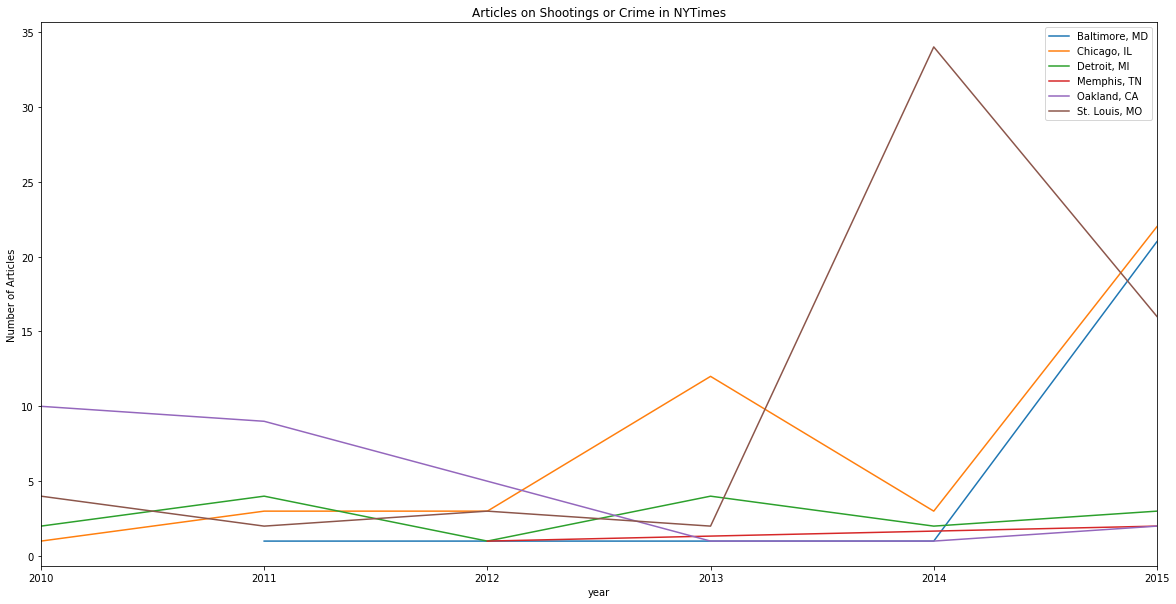

In [15]:

fig, ax = plt.subplots(figsize=(20,10))
grouped = g.groupby('city')
for key, group in grouped:
    group.plot(ax =ax, x = 'year', y='headline', label=key)
ax.set( ylabel='Number of Articles',
       title='Articles on Shootings or Crime in NYTimes')


Coverage in general is low, but there are spikes in St. Louis in 2014 and in Chicago and 2013. Let's find out why.

In [16]:
#mydf[['headline', 'snippet']]

In [88]:
#mydf.to_csv("nytimes_articles.csv")
#raw_data.to_csv("formatted_crime_data.csv")

In [17]:
descWide = mydf.pivot(columns ='city', values= 'snippet')
descWide.tail()

city,"Baltimore, MD","Chicago, IL","Detroit, MI","Memphis, TN","Oakland, CA","St. Louis, MO"
170,In Upton-Druid Heights &#8212; one of Baltimor...,None,None,None,None,None
171,When Sheryl Gay Stolberg became mid-Atlantic b...,None,None,None,None,None
172,Commonly known as the police officers’ bill of...,None,None,None,None,None
173,"Some call a curfew law, to be enforced this su...",None,None,None,None,None
174,Mr. Schaefer was a political showman who capti...,None,None,None,None,None


In [26]:


stop_words = set(stopwords.words('english'))
throwaways = [".", ",", "!","'", "'s", "n't", "''","...","``", ")", "(", "us" ,"would","one","'ve", "?", "\\\\",
             "got","gets","went", "none","'m","[","]",":","also","-","'re","'ll",";",":","#","&","--","'","said","say",
              "'the", "'a"] # a list of punction and things to get rid of


In [31]:
#make each column all the reviews for a particular restaurant
descWide = mydf.pivot(columns ='city', values= 'snippet')

#function returns an object where each restaurant is key, and the item is a list of top 40 frequency tuples
def topwords_fun(articles):
    
    bigstring = str(articles.tolist()).lower().strip("'")#(r"\\n\\")
    tokens = word_tokenize(bigstring)
    #print(tokens)
    
    filtered_desc = []
    for word in tokens:
        if word not in stop_words and word not in throwaways:
            filterd_desc = filtered_desc.append(word)
    
    freqd = nltk.FreqDist(filtered_desc)
    topwords = freqd.most_common(40)
    
    return(topwords)
    
    
    
topWordsDic = descWide.apply(topwords_fun, axis=0)

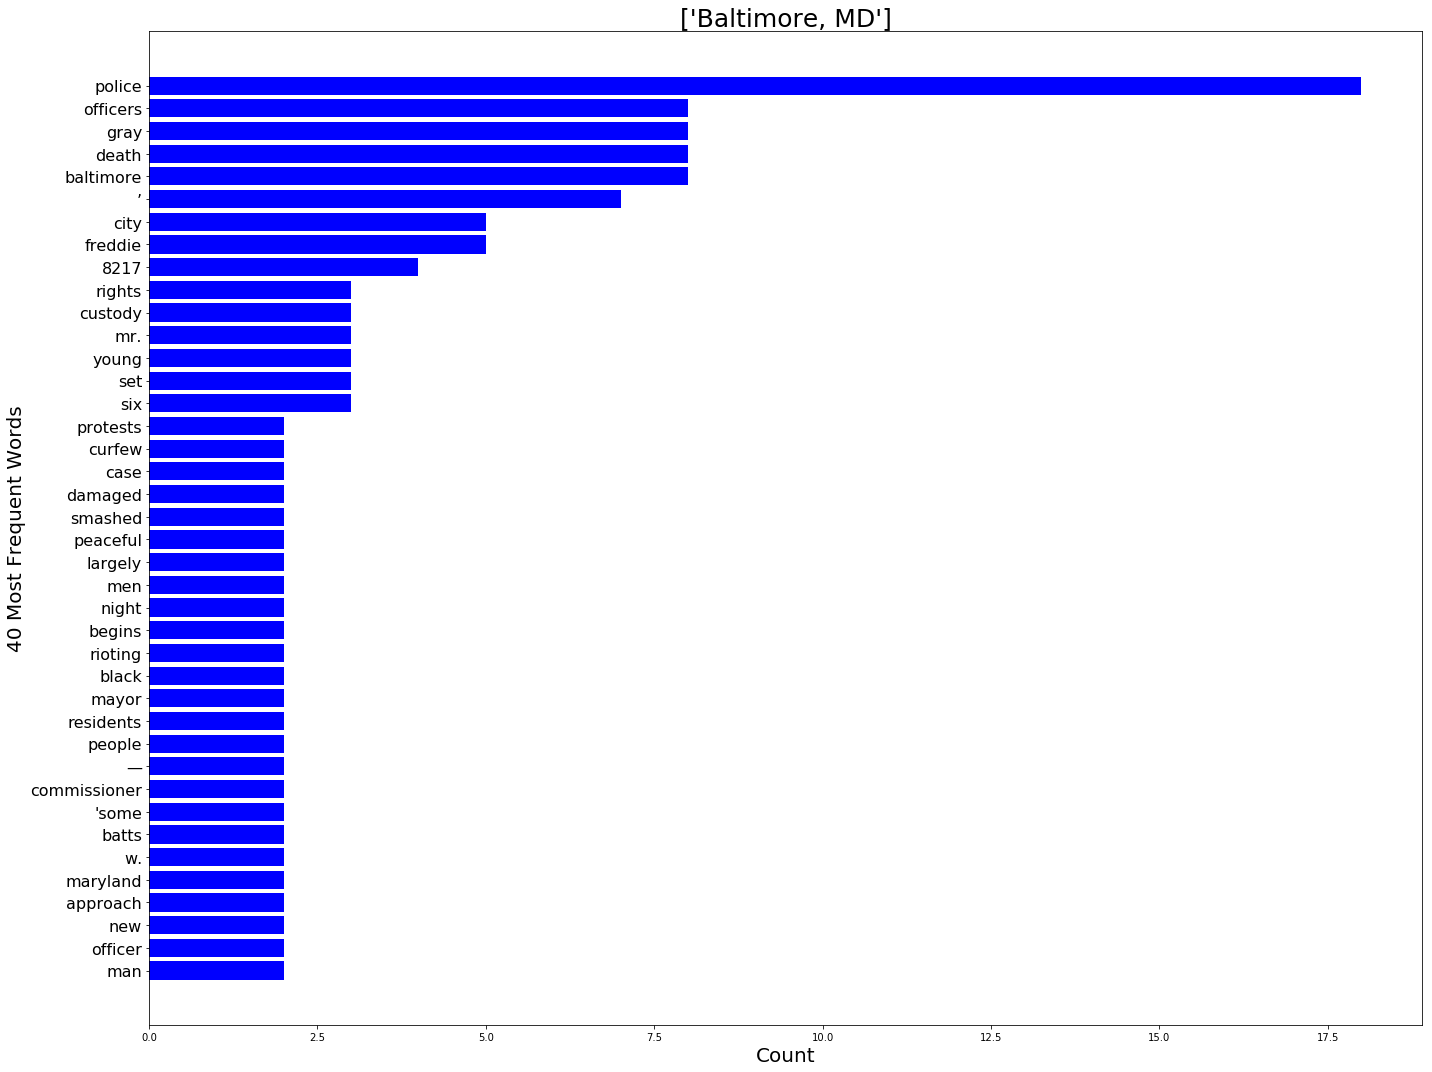

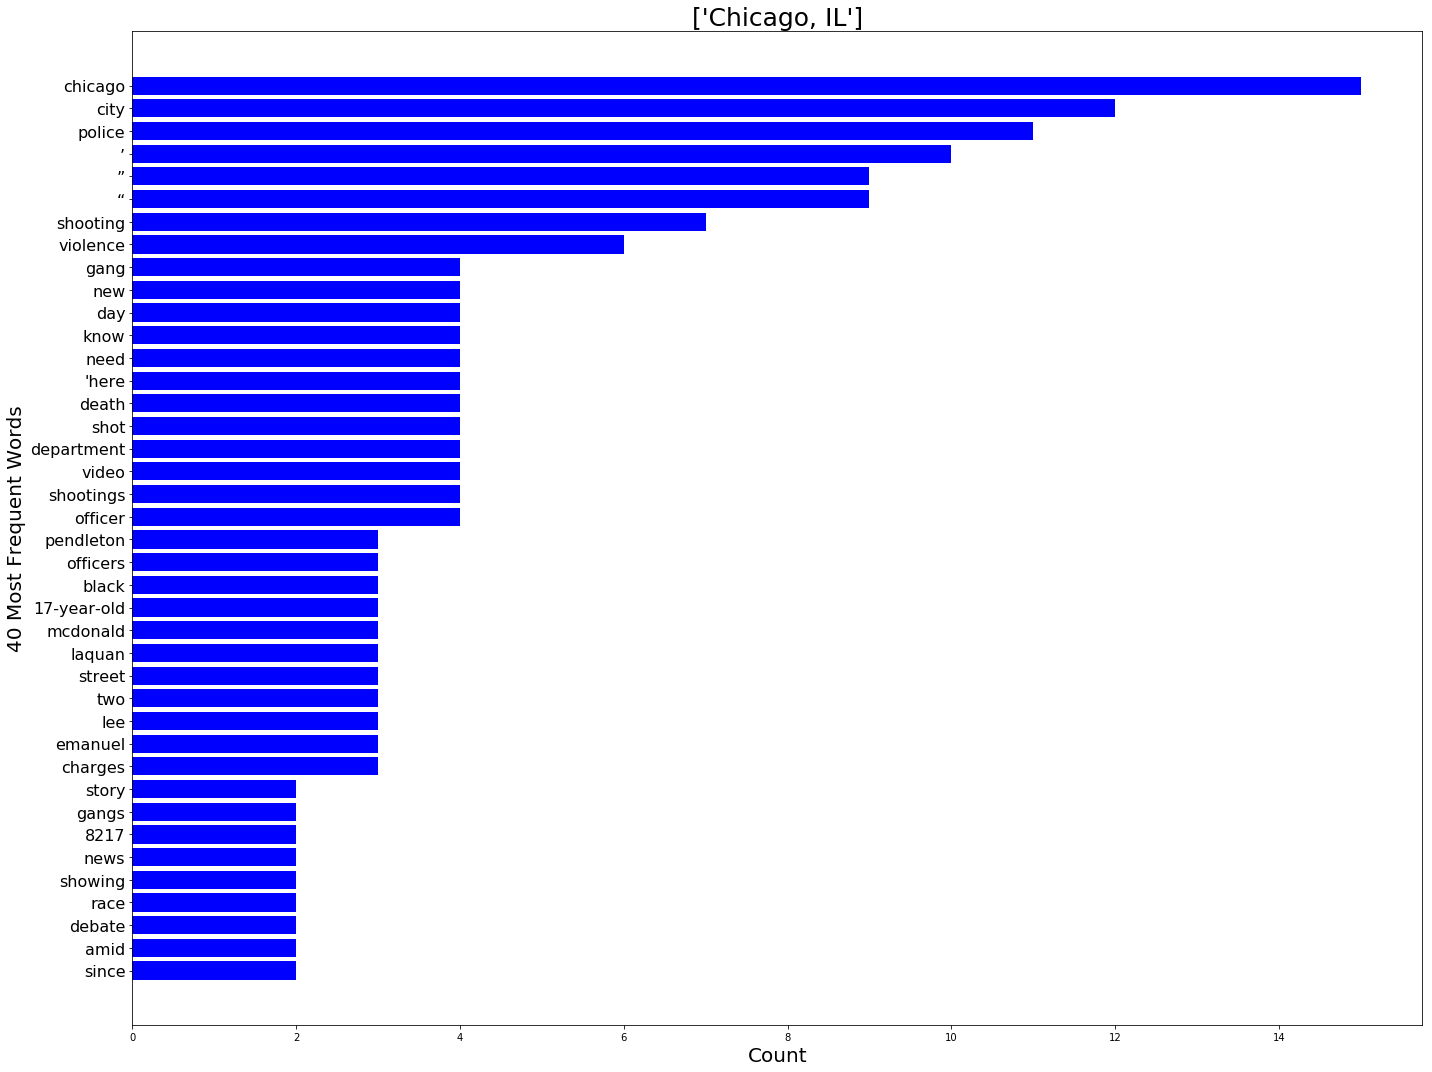

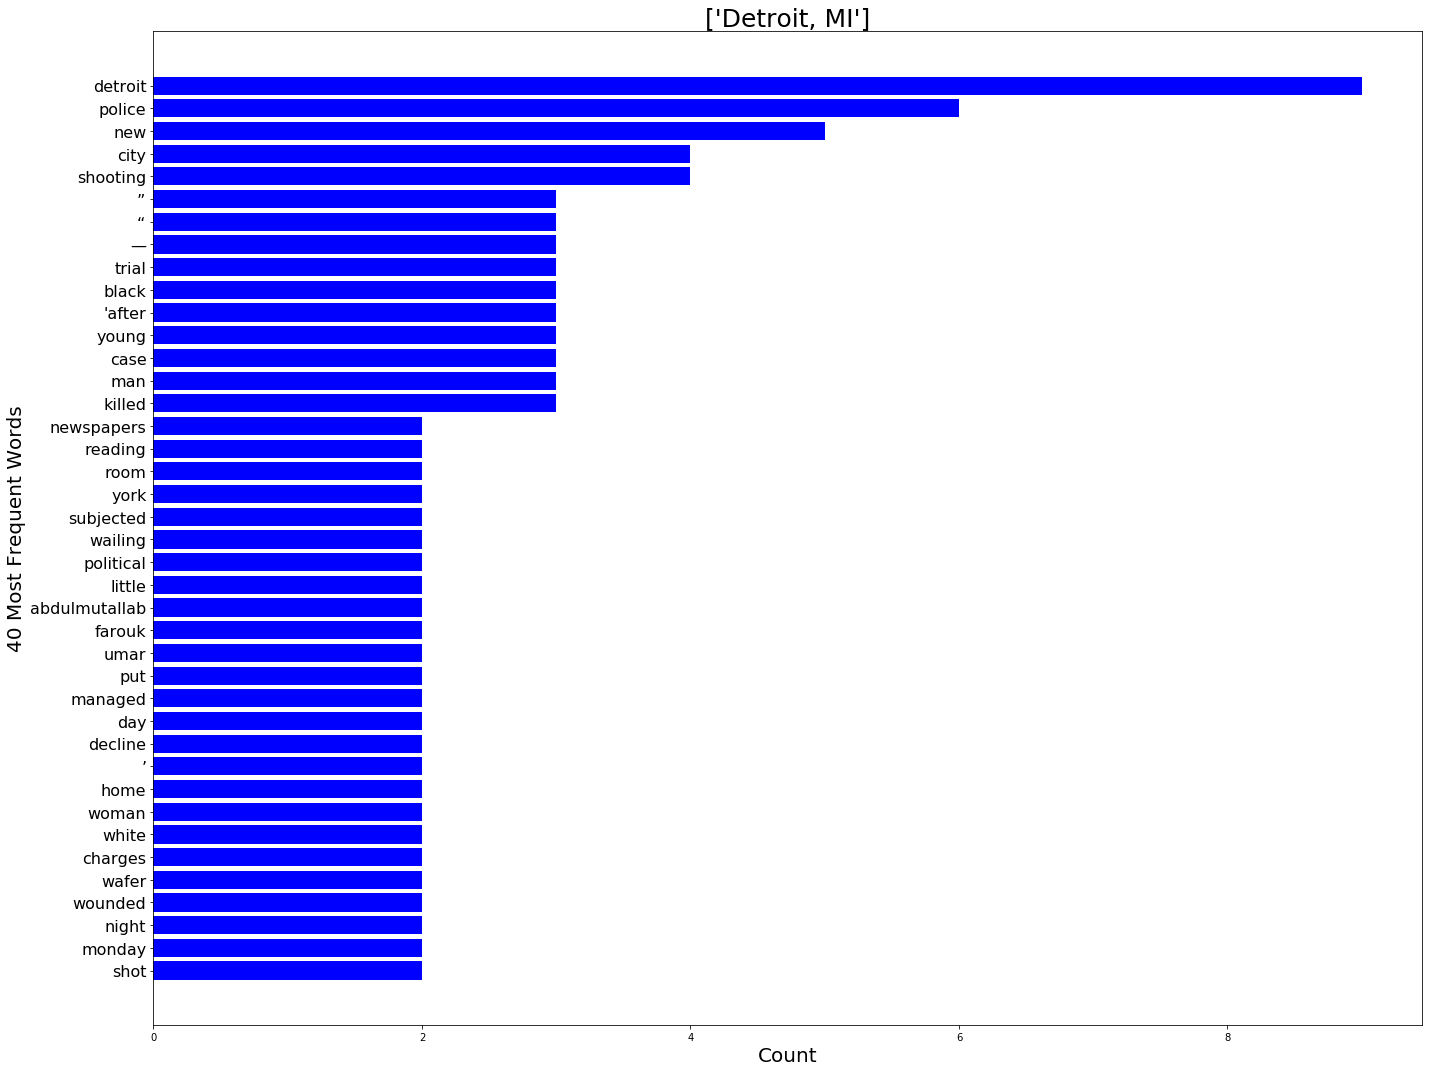

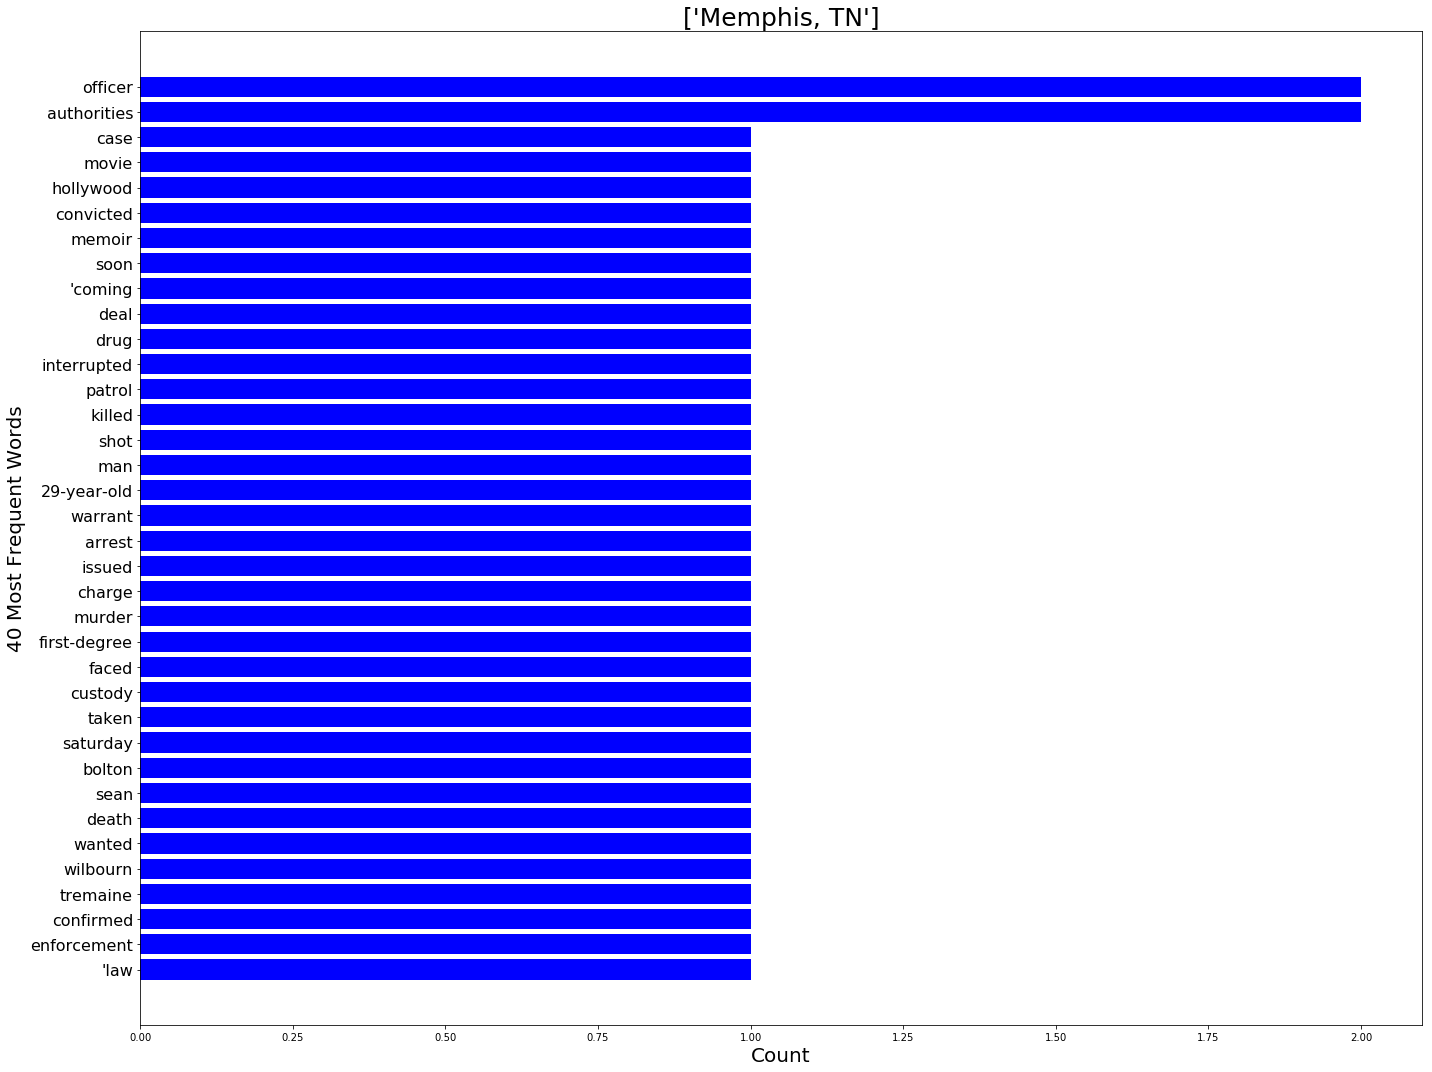

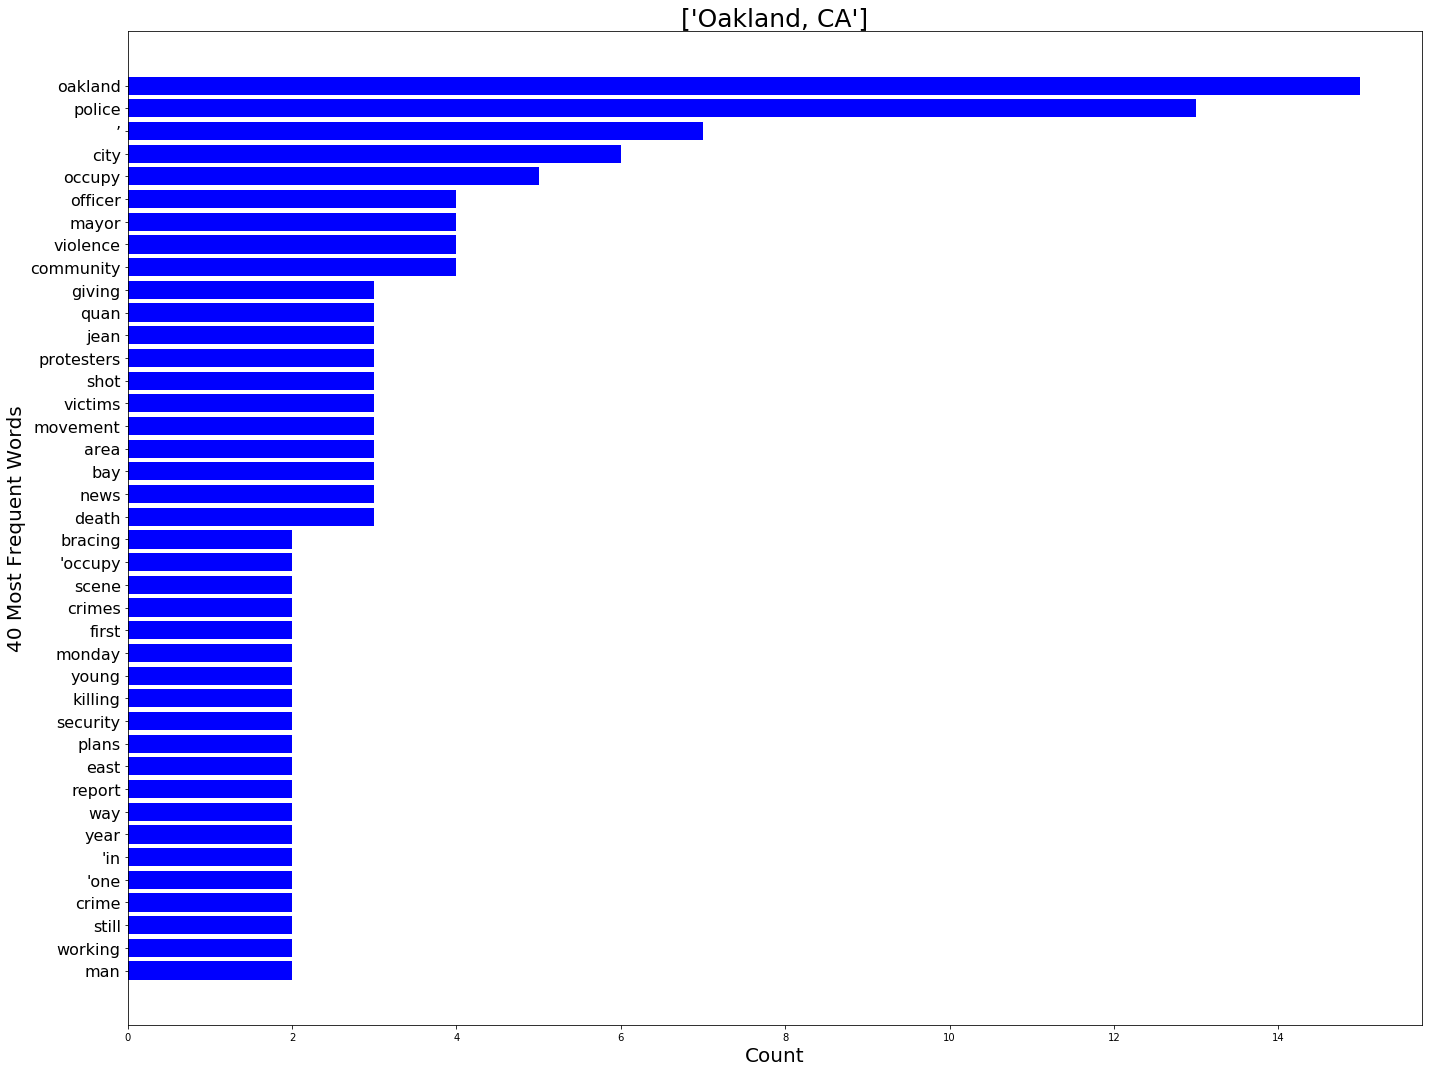

In [36]:
from operator import itemgetter, attrgetter

#Create bar plots for all top words
topWords_df = pd.DataFrame(topWordsDic)


for row in list(range(1,len(topWords_df))):
    
    tw = topWords_df[row - 1:row]
    tw = tw.values.tolist()[0][0] #doing this unlist caused a multiple nested list, so need to get out of that
    tw.sort(key=itemgetter(1)) #need to sort by frequencys to get descending order in bar graph
    
    res = topWords_df[row - 1:row].index.values


    word = []
    frequency = []
    #samp = topWords_df[:1]

    for i in range(len(tw)):
        word.append(tw[i][0])
        frequency.append(tw[i][1])


    indices = np.arange(len(tw))
    ax = plt.subplots(figsize=(20,15))
    plt.title(res, fontsize=25)
    plt.xlabel('Count',fontsize = 20)
    plt.ylabel('40 Most Frequent Words',fontsize = 20)
    plt.barh(indices, frequency, color='blue')
    plt.yticks(indices, word, rotation='horizontal',size=16)

    plt.tight_layout()
    plt.show()

In [33]:
#function returns filtered list of words for each restaurant
def filteredtxt_fun(articles):
    #global(stop_words)
    #global(throwaways)
    
    bigstring = str(articles.tolist()).lower().strip(r"\\n\\")
    tokens = word_tokenize(bigstring)
    
    filtered_desc = []

    for word in tokens:
        if word not in stop_words and word not in throwaways:
            filterd_desc = filtered_desc.append(word)
    
    return(filtered_desc)
    
    
    
    
filt_txt = descWide.apply(filteredtxt_fun, axis=0)

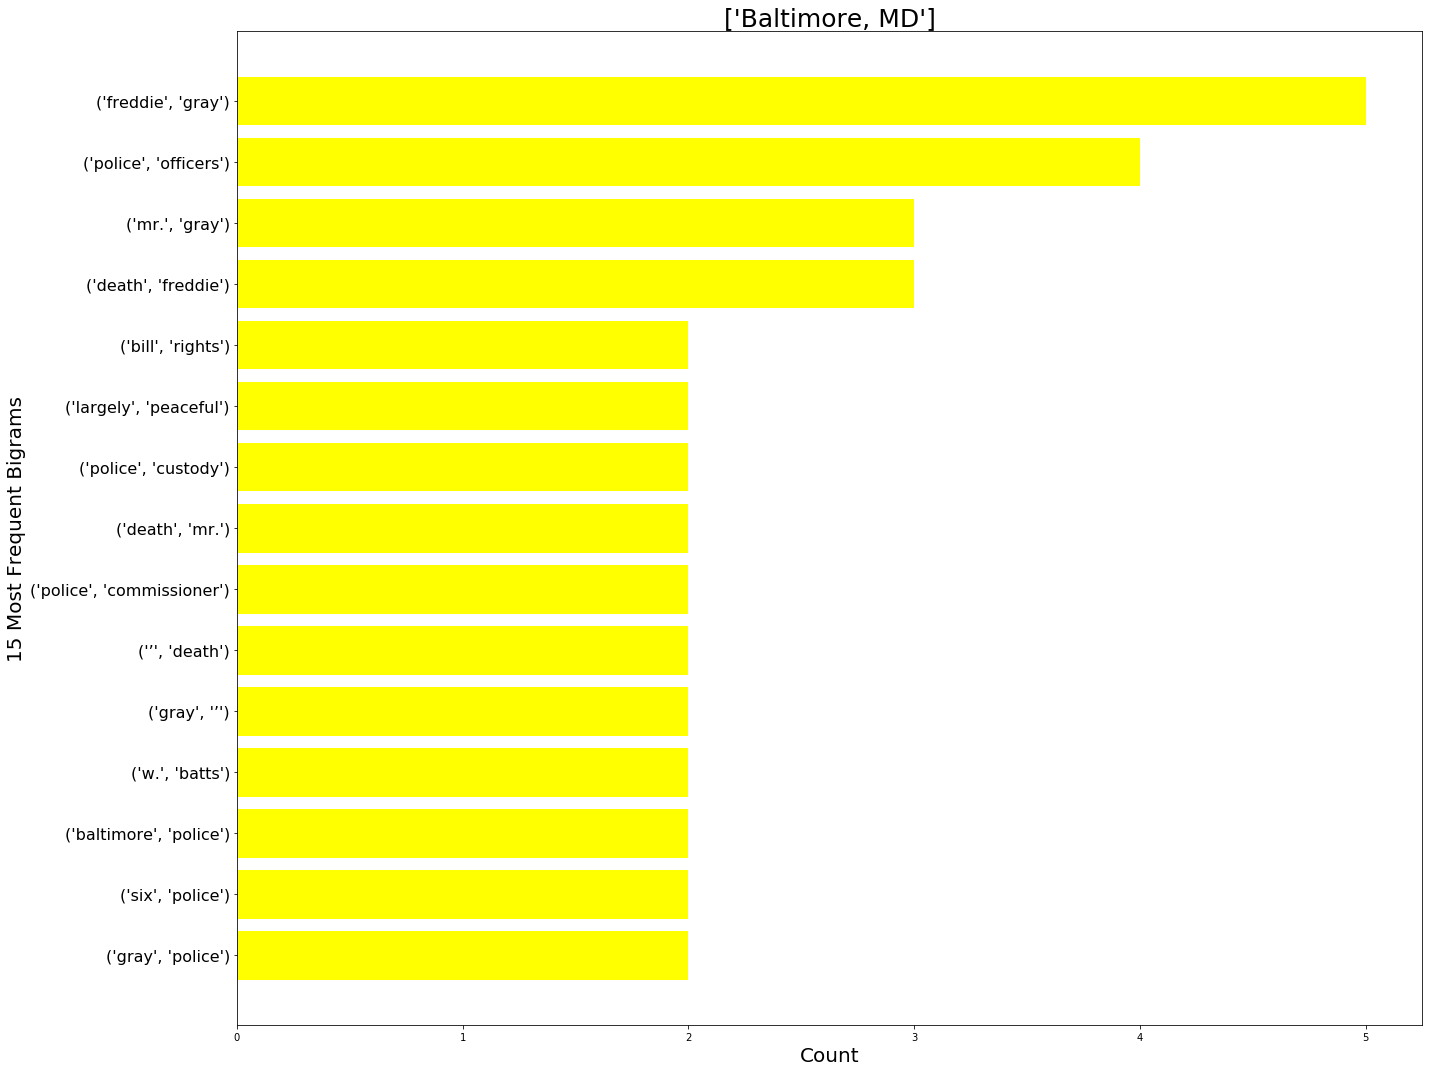

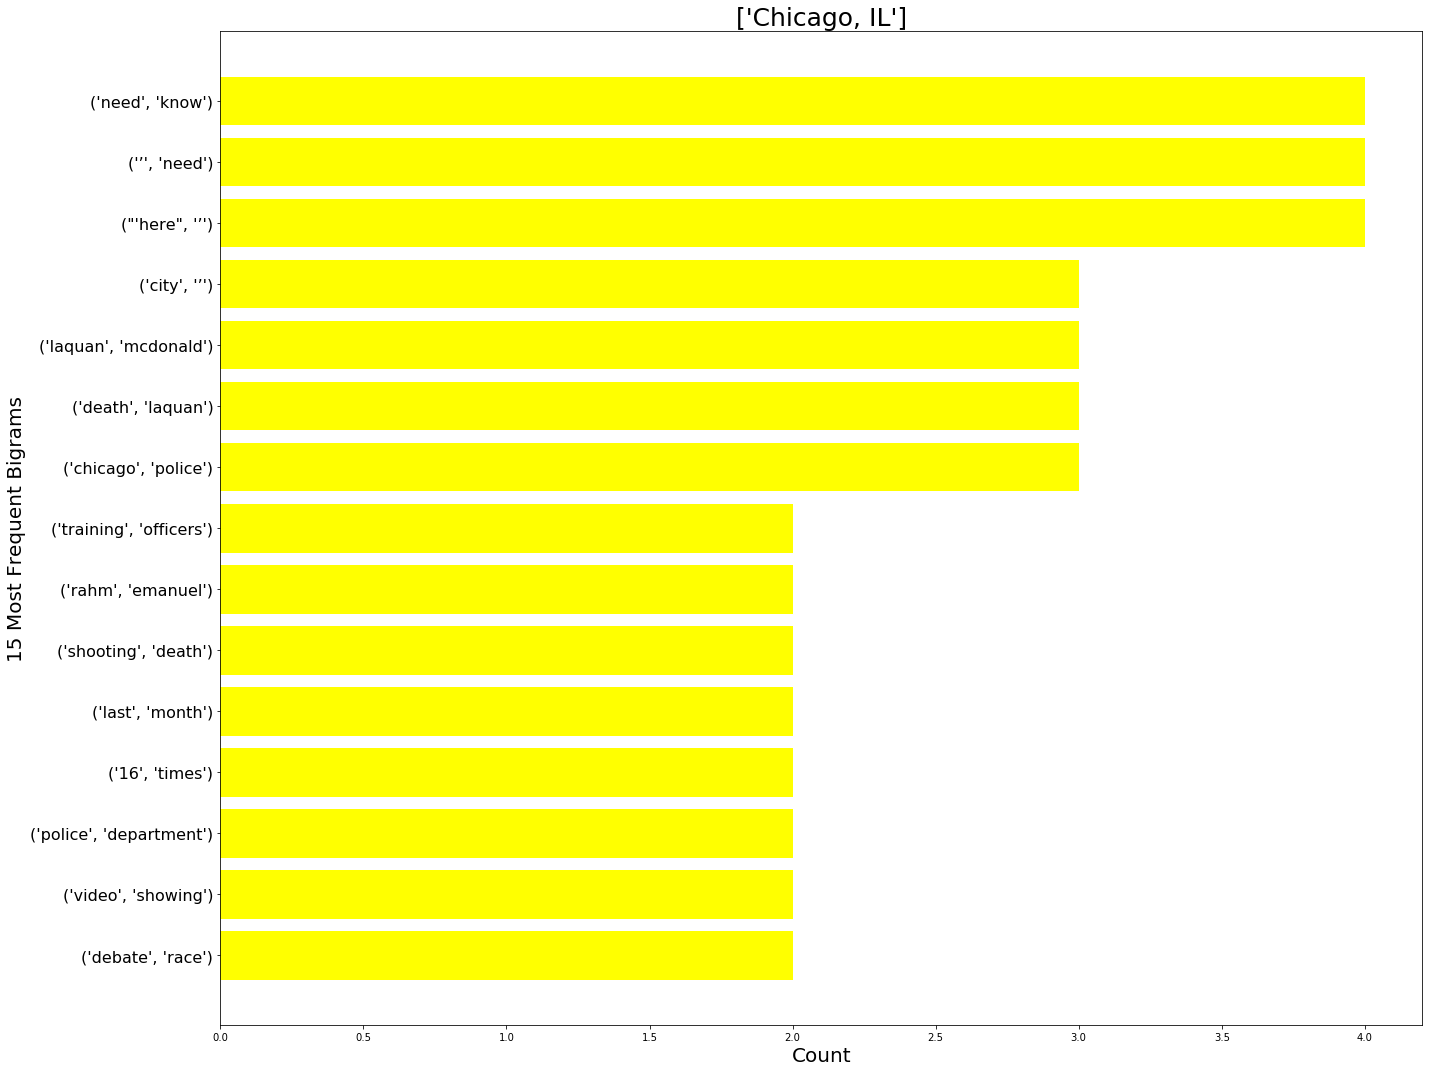

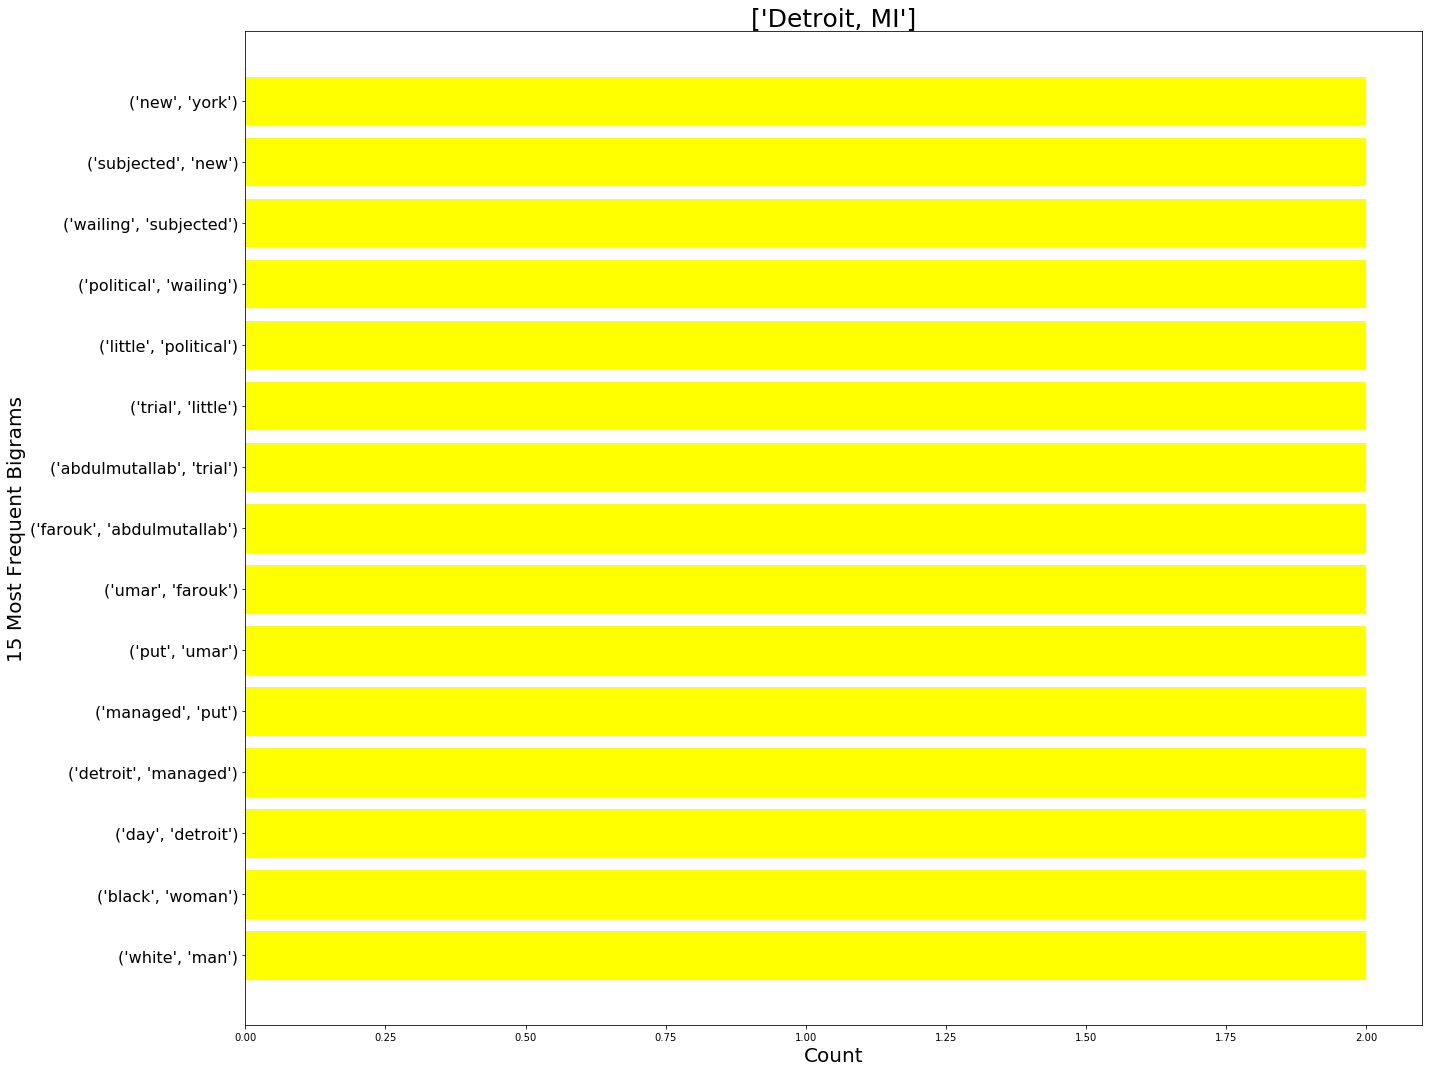

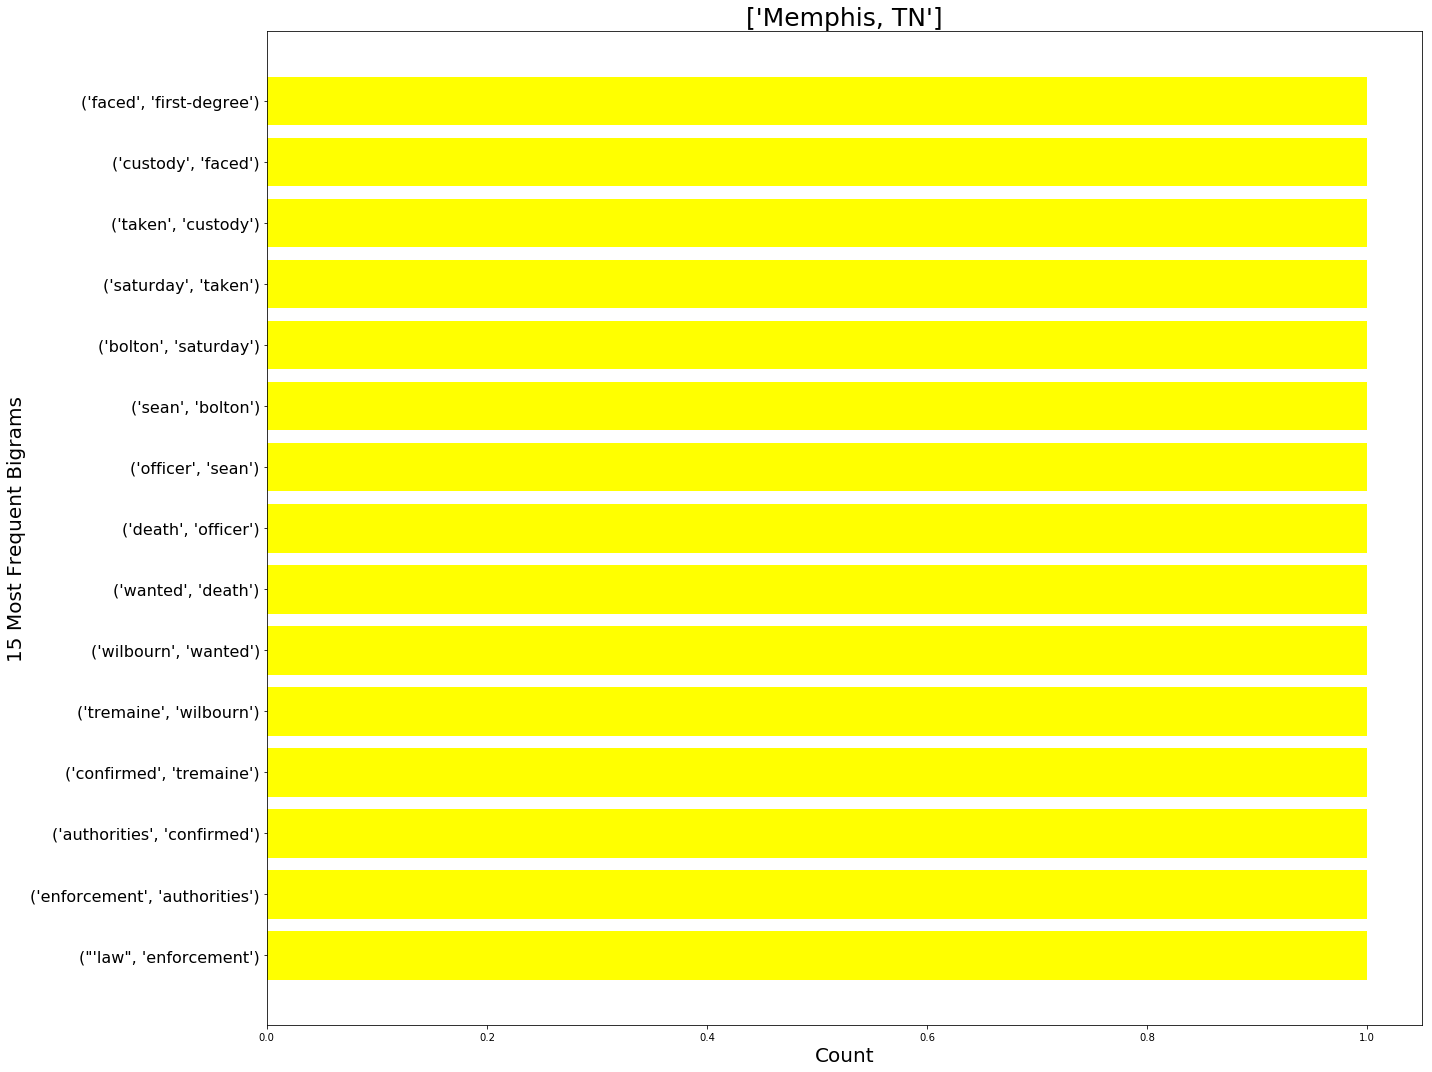

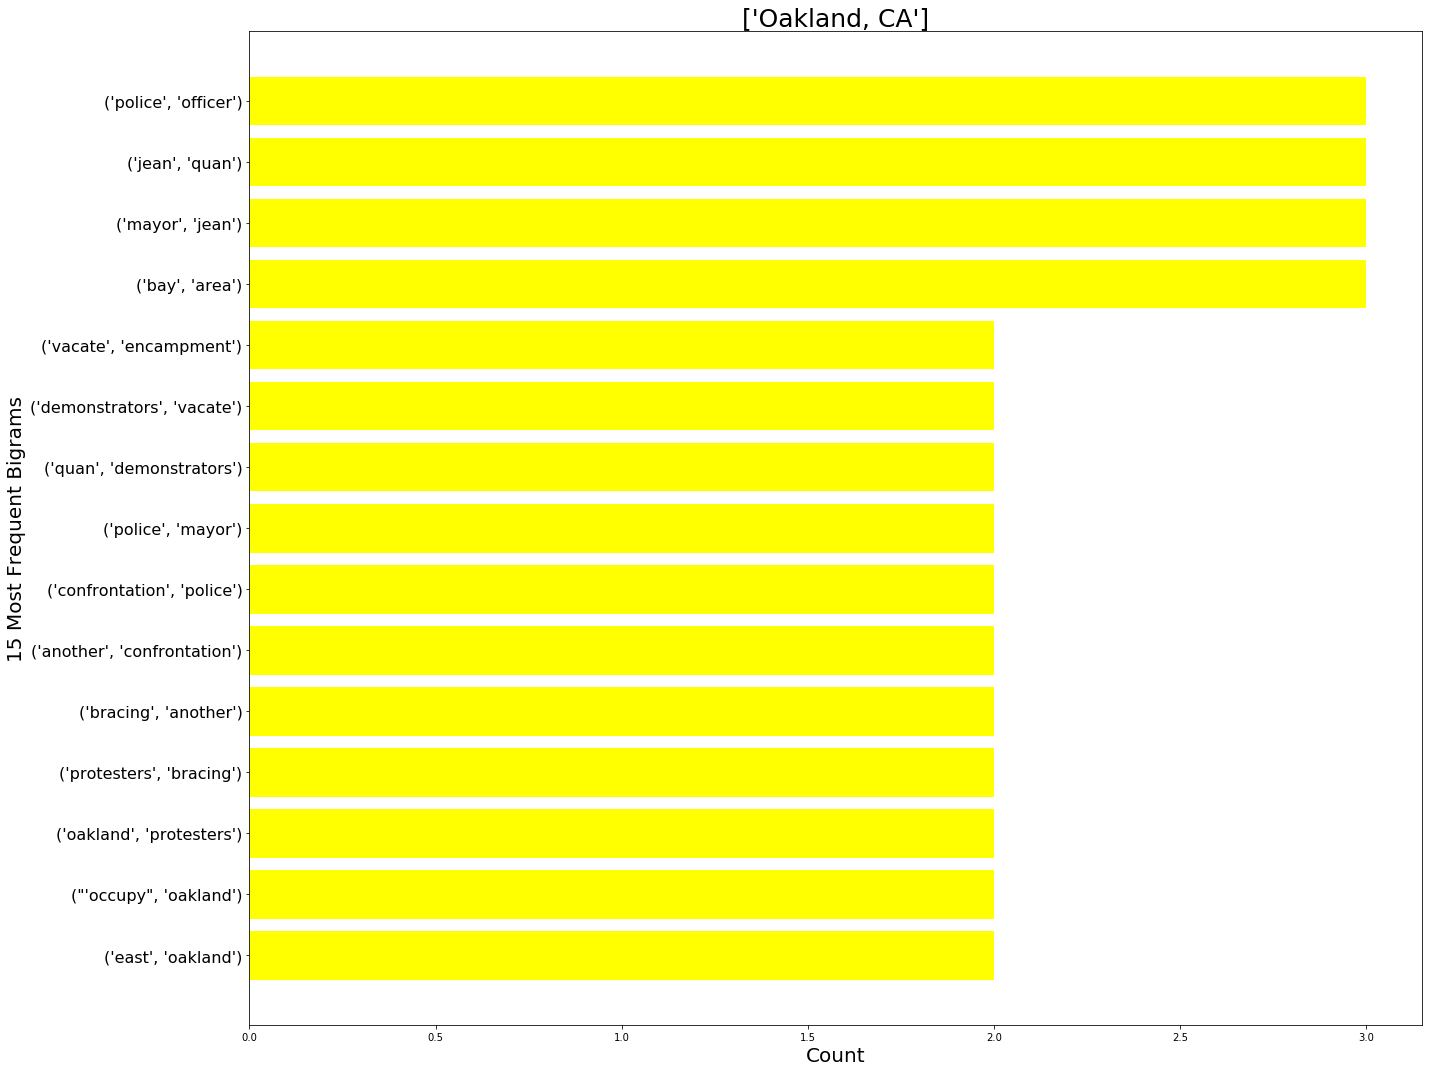

In [34]:
#take the filtered list of words from the prior step and make plots for each restaurant

for row in list(range(1,len(filt_txt))): #this ammounts to each row
    
    #filt_txt[:i]
    
    tbg = filt_txt[row - 1:row]
    #tbg.sort_values(ascending=True),#this not working
    res = filt_txt[row - 1:row].index.values
    
    
    bgrams = list(nltk.ngrams(" ".join(tbg[0]).split(),2))
    freqBgrams = nltk.FreqDist(bgrams)
    
    topBgrams = freqBgrams.most_common(15)
    topBgrams.sort(key=itemgetter(1))
    
    word = []
    frequency = []
    for i in list(range(len(topBgrams))): # 15 is the number of tuples it should be since I'm finding top 15
        word.append(topBgrams[i][0]) #i is going to be number of tuples for a restuarant;
        frequency.append(topBgrams[i][1])


    indices = np.arange(len(topBgrams)) #or filttxt
    ax = plt.subplots(figsize=(20,15))
    plt.title(res, fontsize=25)
    plt.xlabel('Count',fontsize = 20)
    plt.ylabel('15 Most Frequent Bigrams',fontsize = 20)
    plt.barh(indices, frequency, color='yellow')
    plt.yticks(indices, word, rotation='horizontal',size=16)

    plt.tight_layout()
    plt.show()

### Looking at bigrams of the articles for each city, we see that the Freddie Gray incident in St. Louis drives the amount of news coverage, and the Laquan McDonald incident in Chicago drives coverage there. And this is consistent with the date spikes in each city.

In [37]:
descWide

city,"Baltimore, MD","Chicago, IL","Detroit, MI","Memphis, TN","Oakland, CA","St. Louis, MO"
0,None,The city spent more than $500 million settling...,None,None,None,None
1,None,This article points out that charges against t...,None,None,None,None
2,None,"Mr. Emanuel, who has faced calls to resign ami...",None,None,None,None
3,None,"Tyshawn Lee, was reportedly singled out becaus...",None,None,None,None
4,None,What Spike Lee misunderstands about the city's...,None,None,None,None
5,None,The lawyer for the officer said his client loo...,None,None,None,None
6,None,The younger boy was shot in the face after his...,None,None,None,None
7,None,"The superintendent, Garry F. McCarthy, and his...",None,None,None,None
8,None,The Chicago Police Department was already the ...,None,None,None,None
9,None,The Chicago city officials who delayed justice...,None,None,None,None


city
Baltimore, MD    [baltimore, county, police, released, video, s...
Chicago, IL      [city, spent, $, 500, million, settling, polic...
Detroit, MI      [pastor, shot, killed, man, tried, attack, bri...
Memphis, TN      ['law, enforcement, authorities, confirmed, tr...
Oakland, CA      [27-year-old, man, ’, death, working, communit...
St. Louis, MO    [police, chief, thursday, unapologetically, de...
dtype: object

In [39]:
filt_txt.to_csv("words_in_snippets_by_city.csv")

In [40]:
descWide

city,"Baltimore, MD","Chicago, IL","Detroit, MI","Memphis, TN","Oakland, CA","St. Louis, MO"
0,None,The city spent more than $500 million settling...,None,None,None,None
1,None,This article points out that charges against t...,None,None,None,None
2,None,"Mr. Emanuel, who has faced calls to resign ami...",None,None,None,None
3,None,"Tyshawn Lee, was reportedly singled out becaus...",None,None,None,None
4,None,What Spike Lee misunderstands about the city's...,None,None,None,None
5,None,The lawyer for the officer said his client loo...,None,None,None,None
6,None,The younger boy was shot in the face after his...,None,None,None,None
7,None,"The superintendent, Garry F. McCarthy, and his...",None,None,None,None
8,None,The Chicago Police Department was already the ...,None,None,None,None
9,None,The Chicago city officials who delayed justice...,None,None,None,None


,date,headline,snippet,source,type,url,word_count,city,year
0,2015-12-18,Chicago Pays Millions but Punishes Few in Kill...,The city spent more than $500 million settling...,The New York Times,News,https://www.nytimes.com/2015/12/18/us/chicago-...,2538,"Chicago, IL",2015
1,2015-11-25,News Q&#8217;s | Chicago Protests Mostly Peace...,This article points out that charges against t...,The New York Times,Blog,https://learning.blogs.nytimes.com/2015/11/25/...,399,"Chicago, IL",2015
2,2015-12-29,Mayor Rahm Emanuel Cuts Trip to Cuba Short Aft...,"Mr. Emanuel, who has faced calls to resign ami...",The New York Times,News,https://www.nytimes.com/2015/12/29/us/mayor-ra...,333,"Chicago, IL",2015
3,2015-11-06,"Boy, 9, Was Pawn in Gang War, Chicago Police Say","Tyshawn Lee, was reportedly singled out becaus...",The New York Times,News,https://www.nytimes.com/2015/11/06/us/tyshawn-...,531,"Chicago, IL",2015
4,2015-12-07,‘Chi-Raq’ and the Myth of Chicago Gang Wars,What Spike Lee misunderstands about the city's...,The New York Times,News,https://www.nytimes.com/2015/12/07/magazine/ch...,1133,"Chicago, IL",2015
5,2015-12-30,"Jason Van Dyke, Chicago Officer Who Shot Laqua...",The lawyer for the officer said his client loo...,The New York Times,News,https://www.nytimes.com/2015/12/30/us/laquan-m...,619,"Chicago, IL",2015
6,2015-10-20,"Chicago Father Charged After Boy, 6, Kills Bro...",The younger boy was shot in the face after his...,The New York Times,News,https://www.nytimes.com/2015/10/20/us/chicago-...,718,"Chicago, IL",2015
7,2015-12-01,Mayor Rahm Emanuel Fires Chicago Police Superi...,"The superintendent, Garry F. McCarthy, and his...",The New York Times,News,https://www.nytimes.com/2015/12/02/us/chicago-...,1359,"Chicago, IL",2015
8,2015-12-27,"Chicago Police Fatally Shoot 2, Raising New Qu...",The Chicago Police Department was already the ...,The New York Times,News,https://www.nytimes.com/2015/12/27/us/chicago-...,974,"Chicago, IL",2015
9,2015-11-30,Cover-Up in Chicago,The Chicago city officials who delayed justice...,The New York Times,Op-Ed,https://www.nytimes.com/2015/11/30/opinion/cov...,827,"Chicago, IL",2015


### There's not enough data here from this site alone to get a good idea of news coverage of crime and it's affect on public perceptions. Moving forward, gathering articles from some varied news sources would be a good way to get a better scope of the breadth of coverage.